# MQT Qudits 🌌
*Discover a New Dimension in Quantum Computing*

Embark on a journey with MQT Qudits, a cutting-edge toolkit for Mixed-Dimensional Quantum Computing.

🚀 **New Language:**
Dive into a language meticulously designed to express quantum algorithms and circuits. MQT extends the openQASM 2.0 grammar, effortlessly adapting to registers that feature a harmonious mix of qudits and qubits in diverse combinations. 


In [24]:
from mqt.qudits.qudit_circuits.circuit import QuantumCircuit

After the import of the quantum circuit object, it is possible starting from a __DITQASM__ program to automatically create a circuit and manipulate it, if not simulate it or compile it to a more suitable gate-set for the machine.
In the next cell the program is explicitly written, although several methods for importing programs from files are present in the library.

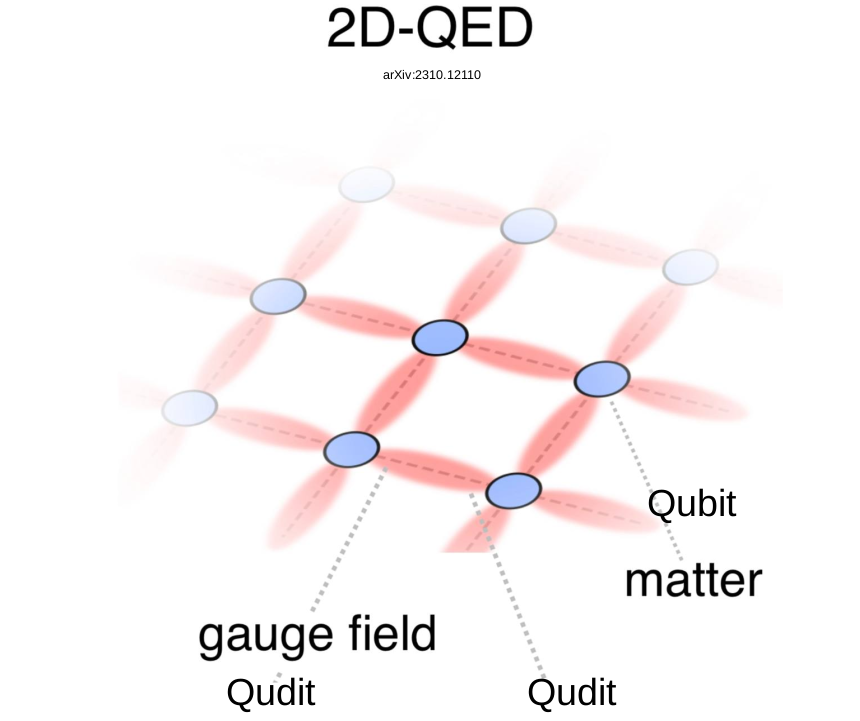

In [25]:
qasm = """
        DITQASM 2.0;
        
        qreg fields [3][5,5,5];
        qreg matter [2][2,2];
        
        creg meas_matter[2];
        creg meas_fields[3];
        
        h fields[2] ctl matter[0] matter[1] [0,0];
        cx fields[2], matter[0];
        cx fields[2], matter[1];
        rxy (0, 1, pi, pi/2) fields[2];
        
        measure q[0] -> meas[0];
        measure q[1] -> meas[1];
        measure q[2] -> meas[2];
        """

A new feature is the __control syntax__: _operation_   __ctl__  _quditline_  \[list of qudit control levels\]
<br>
We can import the QASM program and construct a quantum circuit.


In [26]:
circuit = QuantumCircuit()
circuit.from_qasm(qasm)

print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")


 Number of operations: 4, 
 Number of qudits in the circuit: 5


/home/k3vn/Documents/MQTQUDIT_DEV/MQTQudit/src/mqt/qudits/qudit_circuits/qasm_interface/qasm.py:174: SyntaxWarning: Unsupported operation ignored: creg
  if self.parse_ignore(line, rgxs, warned):
/home/k3vn/Documents/MQTQUDIT_DEV/MQTQudit/src/mqt/qudits/qudit_circuits/qasm_interface/qasm.py:174: SyntaxWarning: Unsupported operation ignored: measure
  if self.parse_ignore(line, rgxs, warned):


### Python Interface 🐍

Constructing and manipulating quantum programs becomes a breeze with Python. You have the flexibility to:

1. **Initialize Quantum Circuits:** Start by creating your quantum circuits effortlessly.

2. **Create Quantum Registers:** Build dedicated quantum registers tailored to your needs.

3. **Compose Circuits:** Seamlessly bring together your quantum registers, forming a unified and powerful circuit.

4. **Apply Operations:** Easily apply a variety of qudit operations, without worrying about the right representation. 

Feel the comfort of quantum programming with the ease of Python integration. 💻


In [27]:
from mqt.qudits.qudit_circuits.components.registers.quantum_register import QuantumRegister


circuit = QuantumCircuit()

field_reg = QuantumRegister("fields", 1, [3])
ancilla_reg = QuantumRegister("ancillas", 1, [3])

circuit.append(field_reg)
circuit.append(ancilla_reg)

print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")


 Number of operations: 0, 
 Number of qudits in the circuit: 2


##### No operations were inserted yet, let's take a look at how operations can be applied!

The size of every line is detected automatically and the right operations are applied to the right qudits

In [28]:
h = circuit.h(field_reg[0]) 

In [29]:
csum = circuit.csum([field_reg[0], ancilla_reg[0]])

In [30]:
print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")


 Number of operations: 2, 
 Number of qudits in the circuit: 2



##### It is possible to export the code as well and share your program in a QASM file.
<br>

In [31]:
print(circuit.to_qasm())

DITQASM 2.0;
qreg fields [1][3];
qreg ancillas [1][3];
creg meas[2];
h fields[0];
csum fields[0], ancillas[0];
measure fields[0] -> meas[0];
measure ancillas[0] -> meas[1];



# Simulation 🚀

After crafting your quantum circuit with precision, take it for a spin using two distinct engines, each flaunting its unique set of data structures.

- **External Tensor-Network Simulator:** Delve into the quantum realm with a robust external tensor-network simulator.

- **MiSiM (C++-Powered):** Unleash the power of decision-diagram-based simulation with MiSiM, seamlessly interfaced with Python for a fluid and efficient experience. 🌐💡

In [32]:
from mqt.qudits.simulation.provider.qudit_provider import MQTQuditProvider


provider = MQTQuditProvider()
provider.backends("sim")

['tnsim', 'misim']

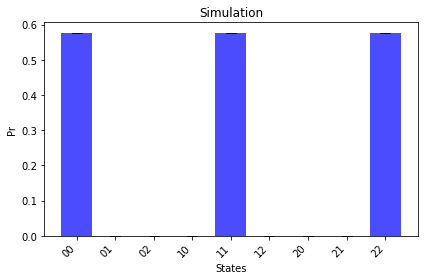

In [33]:
from mqt.qudits.visualisation.plot_information import plot_counts, plot_state

backend = provider.get_backend("tnsim")

job = backend.run(circuit)
result = job.result()

state_vector = result.get_state_vector()

plot_state(state_vector, circuit)

### Extending Engines with Noise Model and Properties for FakeBackend

Enhance your quantum simulation experience by extending the engines with a noise model and incorporating various properties. This process allows you to create a FakeBackend, inspired by the best machines in experimental laboratories.

#### Noise Model Integration

Introduce realism into your simulations by incorporating a noise model. Simulate the effects of environmental factors and imperfections, bringing your quantum algorithms closer to real-world scenarios.


#### Creating a FakeBackend

By combining a noise model and carefully tuned properties, you can craft a FakeBackend that closely emulates the performance of the best quantum machines in experimental laboratories. This allows for more realistic and insightful quantum simulations.

Experiment, iterate, and simulate quantum circuits with the sophistication of real-world conditions, all within the controlled environment of your simulation. 🛠️🔬


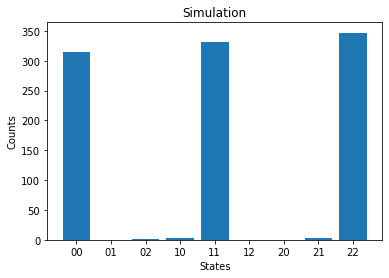

{'00': 314,
 '01': 0,
 '02': 1,
 '10': 3,
 '11': 332,
 '12': 0,
 '20': 0,
 '21': 3,
 '22': 347}

In [34]:
backend_ion = provider.get_backend("faketraps2trits", shots=1000)

job = backend_ion.run(circuit)
result = job.result()
counts = result.get_counts()

plot_counts(counts, circuit)

## Compilation ⚙️

Tailor your quantum compilation process to achieve optimal performance and emulate the intricacies of experimental setups.

#### Compiler Customization with Modern Passes

1. **Optimization Strategies:** Implement specific optimization strategies based on your quantum algorithm's characteristics. Fine-tune compilation for better resource utilization and reduced gate counts.

2. **Gate Decomposition:** Customize gate decomposition techniques to match the capabilities of experimental quantum hardware. Aligning with the native gate set enhances the efficiency of your compiled circuits.

##### Experimental-Inspired Compilation

Emulate the features of the best experimental laboratories in your compilation process. Leverage modern compiler passes to customize optimization, gate decomposition, and noise-aware strategies, creating compiled circuits that closely resemble the challenges and advantages of cutting-edge quantum hardware.

Customize, compile, and push the boundaries of quantum algorithms with a tailored approach to quantum compilation. 🛠️🔧🚀


In [35]:
from mqt.qudits.compiler.dit_manager import QuditManager


In [36]:
qudit_compiler = QuditManager()

passes = ["LocQRPass"]

In [37]:
compiled_circuit_qr = qudit_compiler.compile(backend_ion, circuit, passes)

print(f"\n Number of operations: {len(compiled_circuit_qr.instructions)}, \n Number of qudits in the circuit: {compiled_circuit_qr.num_qudits}")


 Number of operations: 10, 
 Number of qudits in the circuit: 2


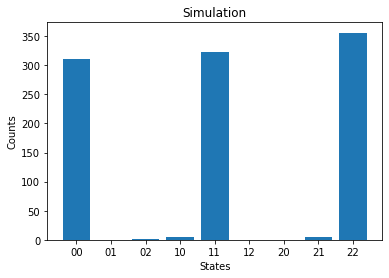

{'00': 311,
 '01': 0,
 '02': 2,
 '10': 4,
 '11': 322,
 '12': 0,
 '20': 0,
 '21': 5,
 '22': 356}

In [38]:
job = backend_ion.run(compiled_circuit_qr)

result = job.result()
counts = result.get_counts()

plot_counts(counts, compiled_circuit_qr)

In [39]:
passes = ["LocAdaPass", "ZPropagationPass", "ZRemovalPass"]

compiled_circuit_ada = qudit_compiler.compile(backend_ion, circuit, passes)

print(f"\n Number of operations: {len(compiled_circuit_ada.instructions)}, \n Number of qudits in the circuit: {compiled_circuit_ada.num_qudits}")


 Number of operations: 5, 
 Number of qudits in the circuit: 2


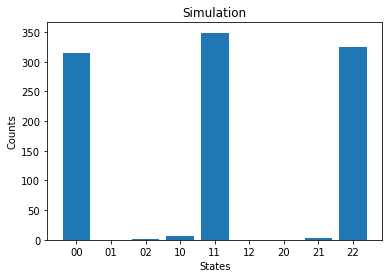

{'00': 314,
 '01': 0,
 '02': 2,
 '10': 7,
 '11': 349,
 '12': 0,
 '20': 0,
 '21': 3,
 '22': 325}

In [40]:
job = backend_ion.run(compiled_circuit_ada)

result = job.result()
counts = result.get_counts()

plot_counts(counts, compiled_circuit_ada)